In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.utils import get_week_range_df, to_week_range

In [2]:
# Global set-up
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['axes.grid'] = True
sns.set_style("whitegrid")

In [3]:
df = get_week_range_df('week range')
df

,year,week,a flu,baby flu,bad flu,chest infection symptoms,child flu,children flu,cold and flu symptoms,cold flu,...,nhs swine,night nurse,stop coughing,tamiflu,tamiflu dosage,tamiflu side effects,the death cure,what is tamiflu,what to eat when you have the flu,Disease Rate
week range,,,,,,,,,,,,,,,,,,,,,
2003-12-29/2004-01-04,2004,1,115.857389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.994878,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,18.716703
2004-01-05/2004-01-11,2004,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,12.366981
2004-01-12/2004-01-18,2004,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,107.997079,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,8.808089
2004-01-19/2004-01-25,2004,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.092730,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.575904
2004-01-26/2004-02-01,2004,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.837619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-19/2018-11-25,2018,47,357.530206,41.092217,27.220088,60.270243,48.803031,72.338072,21.485834,277.574666,...,0.000000,129.701997,96.073783,12.137666,0.0,0.0,5.941338,0.0,12.850613,6.175297
2018-11-26/2018-12-02,2018,48,343.500128,40.303629,25.485104,80.116784,70.849770,102.013875,21.244784,247.225283,...,0.000000,157.086094,49.510694,24.747760,0.0,0.0,28.375626,0.0,5.905376,7.382408
2018-12-03/2018-12-09,2018,49,263.128745,38.461304,27.229028,63.119445,43.211300,66.995693,18.879464,235.339674,...,11.882555,118.620181,85.829489,11.640776,0.0,0.0,21.390838,0.0,0.000000,8.012008


In [4]:
from models.ar_model import ARHelper

arHelper = ARHelper()
arHelper.set_data(df, 'Disease Rate')

In [11]:
train_interval = [to_week_range(2004, 1), to_week_range(2008, 52)]
validate_interval = [to_week_range(2004, 1), to_week_range(2011, 52)]
test_interval = [to_week_range(2012, 1), to_week_range(2016, 52)]

arHelper.split_dataset_by_intervals(train_interval, validate_interval, test_interval, print_data=True)

Training Data 1
-------------
week range
2003-12-29/2004-01-04    18.716703
2004-01-05/2004-01-11    12.366981
2004-01-12/2004-01-18     8.808089
2004-01-19/2004-01-25     6.575904
2004-01-26/2004-02-01     6.837619
                           ...    
2008-11-24/2008-11-30    15.774984
2008-12-01/2008-12-07    25.178583
2008-12-08/2008-12-14    42.756633
2008-12-15/2008-12-21    27.776433
2008-12-22/2008-12-28    36.426270
Freq: W-SUN, Name: Disease Rate, Length: 261, dtype: float64


Validate Data 2
----------
week range
2003-12-29/2004-01-04    18.716703
2004-01-05/2004-01-11    12.366981
2004-01-12/2004-01-18     8.808089
2004-01-19/2004-01-25     6.575904
2004-01-26/2004-02-01     6.837619
                           ...    
2011-11-28/2011-12-04     8.532423
2011-12-05/2011-12-11     6.486688
2011-12-12/2011-12-18     7.303501
2011-12-19/2011-12-25     5.244923
2011-12-26/2012-01-01     8.714857
Freq: W-SUN, Name: Disease Rate, Length: 418, dtype: float64


Test Data 2
----------
we

In [12]:
arHelper.set_model((30, 0, 0))

In [13]:
train_result = arHelper.train_model()
train_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Disease Rate   No. Observations:                  261
Model:              SARIMAX(30, 0, 0)   Log Likelihood                -615.577
Date:                Mon, 28 Feb 2022   AIC                           1293.154
Time:                        02:08:11   BIC                           1403.654
Sample:                    01-04-2004   HQIC                          1337.571
                         - 12-28-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0603      0.029     36.202      0.000       1.003       1.118
ar.L2         -0.0589      0.078     -0.751      0.453      -0.213       0.095
ar.L3          0.0180      0.160      0.113      0.910      -0.295       0.331
ar.L4          0.0008      0.161      0.005      0.996      -0.315       0.317
ar.L5         -0.0178      0.144     -0.124      0.901      -0.300       0.264
ar.L6          0.1051      0.147      0.716      0.474      -0.183       0.393
ar.L7         -0.2277      0.180     -1.266      0.206      -0.580       0.125
ar.L8          0.0968      0.201      0.482      0.629      -0.296       0.490
ar.L9         -0.0251      0.194     -0.129      0.897      -0.406       0.356
ar.L10         0.0155      0.190      0.082      0.935      -0.357       0.388
ar.L11        -0.0023      0.218     -0.011      0.991      -0.430       0.425
ar.L12         0.0866      0.236      0.366      0.714      -0.377       0.550
ar.L13        -0.1477      0.235     -0.628      0.530      -0.609       0.313
ar.L14         0.1168      0.283      0.412      0.680      -0.439       0.672
ar.L15        -0.0105      0.311     -0.034      0.973      -0.620       0.599
ar.L16        -0.0838      0.304     -0.276      0.783      -0.680       0.512
ar.L17         0.0354      0.355      0.100      0.921      -0.660       0.730
ar.L18         0.0263      0.381      0.069      0.945      -0.720       0.773
ar.L19        -0.0123      0.364     -0.034      0.973      -0.725       0.700
ar.L20        -0.0392      0.380     -0.103      0.918      -0.784       0.706
ar.L21        -0.0046      0.398     -0.012      0.991      -0.785       0.776
ar.L22         0.0530      0.417      0.127      0.899      -0.764       0.870
ar.L23        -0.0161      0.420     -0.038      0.969      -0.839       0.807
ar.L24        -0.0141      0.395     -0.036      0.972      -0.789       0.761
ar.L25         0.0058      0.366      0.016      0.987      -0.712       0.724
ar.L26         0.0040      0.362      0.011      0.991      -0.705       0.713
ar.L27        -0.0517      0.351     -0.147      0.883      -0.739       0.636
ar.L28         0.0435      0.333      0.131      0.896      -0.608       0.695
ar.L29        -0.0255      0.346     -0.074      0.941      -0.704       0.653
ar.L30         0.0531      0.216      0.246      0.805      -0.370       0.476
sigma2         6.4410      0.358     18.011      0.000       5.740       7.142
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              2066.58
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using t

In [14]:
test_result = arHelper.test_model()
test_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Disease Rate   No. Observations:                  261
Model:              SARIMAX(30, 0, 0)   Log Likelihood                -557.037
Date:                Mon, 28 Feb 2022   AIC                           1116.075
Time:                        02:08:11   BIC                           1119.640
Sample:                    01-08-2012   HQIC                          1117.508
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1 (fixed)      1.0603        nan        nan        nan         nan         nan
ar.L2 (fixed)     -0.0589        nan        nan        nan         nan         nan
ar.L3 (fixed)      0.0180        nan        nan        nan         nan         nan
ar.L4 (fixed)      0.0008        nan        nan        nan         nan         nan
ar.L5 (fixed)     -0.0178        nan        nan        nan         nan         nan
ar.L6 (fixed)      0.1051        nan        nan        nan         nan         nan
ar.L7 (fixed)     -0.2277        nan        nan        nan         nan         nan
ar.L8 (fixed)      0.0968        nan        nan        nan         nan         nan
ar.L9 (fixed)     -0.0251        nan        nan        nan         nan         nan
ar.L10 (fixed)     0.0155        nan        nan        nan         nan         nan
ar.L11 (fixed)    -0.0023        nan        nan        nan         nan         nan
ar.L12 (fixed)     0.0866        nan        nan        nan         nan         nan
ar.L13 (fixed)    -0.1477        nan        nan        nan         nan         nan
ar.L14 (fixed)     0.1168        nan        nan        nan         nan         nan
ar.L15 (fixed)    -0.0105        nan        nan        nan         nan         nan
ar.L16 (fixed)    -0.0838        nan        nan        nan         nan         nan
ar.L17 (fixed)     0.0354        nan        nan        nan         nan         nan
ar.L18 (fixed)     0.0263        nan        nan        nan         nan         nan
ar.L19 (fixed)    -0.0123        nan        nan        nan         nan         nan
ar.L20 (fixed)    -0.0392        nan        nan        nan         nan         nan
ar.L21 (fixed)    -0.0046        nan        nan        nan         nan         nan
ar.L22 (fixed)     0.0530        nan        nan        nan         nan         nan
ar.L23 (fixed)    -0.0161        nan        nan        nan         nan         nan
ar.L24 (fixed)    -0.0141        nan        nan        nan         nan         nan
ar.L25 (fixed)     0.0058        nan        nan        nan         nan         nan
ar.L26 (fixed)     0.0040        nan        nan        nan         nan         nan
ar.L27 (fixed)    -0.0517        nan        nan        nan         nan         nan
ar.L28 (fixed)     0.0435        nan        nan        nan         nan         nan
ar.L29 (fixed)    -0.0255        nan        nan        nan         nan         nan
ar.L30 (fixed)     0.0531        nan        nan        nan         nan         nan
sigma2             4.1128      0.186     22.084      0.000       3.748       4.478
===================================================================================
Ljung-Box (L1) (Q):                   6.80   Jarque-Bera (JB):               325.94
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.39
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.42

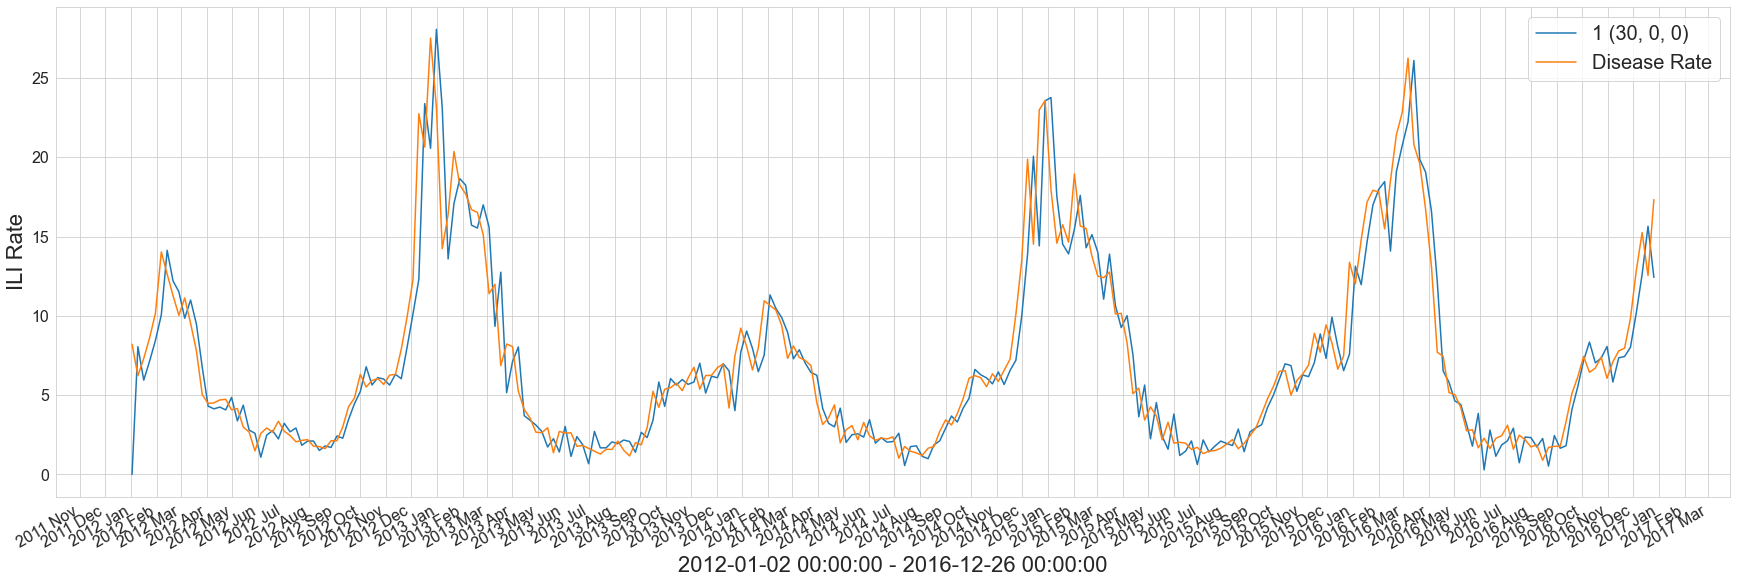

,year,week,a flu,baby flu,bad flu,chest infection symptoms,child flu,children flu,cold and flu symptoms,cold flu,...,night nurse,stop coughing,tamiflu,tamiflu dosage,tamiflu side effects,the death cure,what is tamiflu,what to eat when you have the flu,Disease Rate,"1 (30, 0, 0)"
week range,,,,,,,,,,,,,,,,,,,,,
2012-01-02/2012-01-08,2012,1,75.158350,12.260834,0.000000,33.213497,10.662296,10.046814,15.160331,103.876933,...,61.868399,0.000000,0.000000,0.0,0.000000,23.087480,0.000000,0.000000,8.208383,0.000000
2012-01-09/2012-01-15,2012,2,89.008437,9.858807,12.849231,55.167526,11.811597,23.291844,12.256224,91.294055,...,81.211016,18.509572,18.509572,0.0,0.000000,0.000000,0.000000,0.000000,6.233959,8.057337
2012-01-16/2012-01-22,2012,3,102.628042,10.460135,17.880642,64.224352,4.965759,16.736362,20.251807,66.762956,...,76.529124,0.000000,17.539507,0.0,0.000000,0.000000,0.000000,0.000000,7.312059,5.946159
2012-01-23/2012-01-29,2012,4,94.948504,0.000000,21.522218,71.289169,18.242915,43.689360,11.211431,120.910813,...,36.881706,19.380012,56.261719,0.0,0.000000,0.000000,0.000000,0.000000,8.613503,7.145925
2012-01-30/2012-02-05,2012,5,198.214661,36.720894,12.943785,116.197070,34.890790,73.332179,21.686361,182.319614,...,87.871156,0.000000,77.968380,0.0,0.000000,0.000000,0.000000,0.000000,10.171725,8.455503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-28/2016-12-04,2016,48,150.272484,17.927911,18.882017,61.773325,13.836409,26.907264,22.351080,195.410711,...,98.480730,79.310056,33.896024,0.0,5.293103,39.253223,0.000000,5.817636,9.840249,8.015385
2016-12-05/2016-12-11,2016,49,116.113901,22.717740,21.972153,73.961038,14.297525,25.492983,19.723531,188.042306,...,113.402699,80.773349,40.032559,0.0,0.000000,22.670892,0.000000,0.000000,12.860661,10.195805
2016-12-12/2016-12-18,2016,50,143.863750,20.324438,34.410511,64.914144,18.401006,17.506422,11.736882,179.212924,...,73.902090,86.579407,38.701668,0.0,6.374509,36.954381,5.727608,0.000000,15.255800,12.627224


In [15]:
from models.ar_model import plot_ar_results
full_df = plot_ar_results('test', arHelper)
full_df

In [16]:
from data.errors import Errors

errors = Errors(full_df, 'Disease Rate', '1 (30, 0, 0)')
errors.show_errors()

,years,no. of weeks,MAE,MAPE,MSE,NEG,RMSE
0,2012,52,1.398346,20.395015,5.771811,[],2.402459
1,2013,52,1.436078,27.378083,4.775113,[],2.185203
2,2014,52,1.221936,23.034534,4.018480,[],2.004615
3,2015,53,1.263159,23.254283,2.983933,[],1.727407
4,2016,52,1.601596,28.726258,4.337236,[],2.082603
